**Connect to google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [2]:
import numpy as np
import pandas as pd 
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sea_born
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm,metrics
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

**Import the dataset from drive**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/KD Assignment/Experiment/heart_failure_clinical_records_dataset.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**View Top 10 from dataset**

In [5]:
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


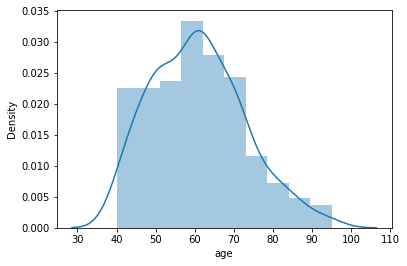

In [6]:
sea_born.distplot(dataset['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


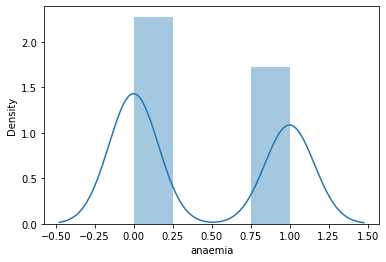

In [7]:
sea_born.distplot(dataset['anaemia'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


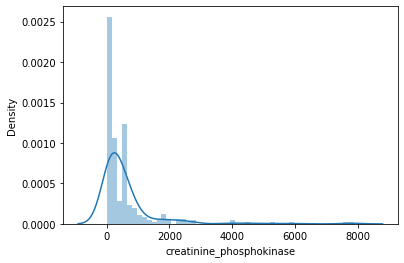

In [8]:
sea_born.distplot(dataset['creatinine_phosphokinase'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


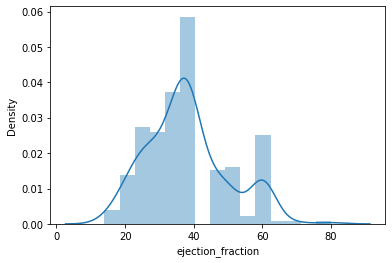

In [9]:
sea_born.distplot(dataset['ejection_fraction'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


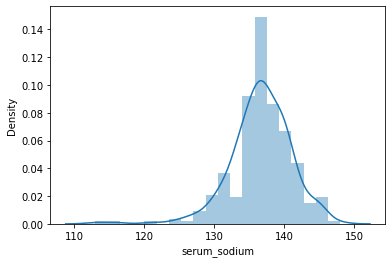

In [10]:
sea_born.distplot(dataset['serum_sodium'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


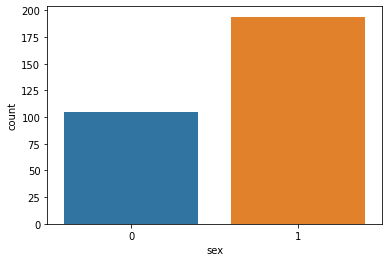

In [11]:
sea_born.countplot(dataset['sex'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


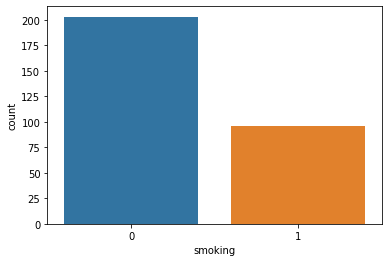

In [12]:
sea_born.countplot(dataset['smoking'])

In [13]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

#Co-relation Matrix

A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

**How to interpret the matrix?**

1.   large positive value (near to 1.0) indicates a strong positive correlation, i.e. , if the value of one of the variables increases, the value of the other variable increases as well.

2.   A large negative value (near to -1.0) indicates a strong negative correlation, i.e., the value of one variable decreases with the other’s increasing and vice-versa.
3. A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.


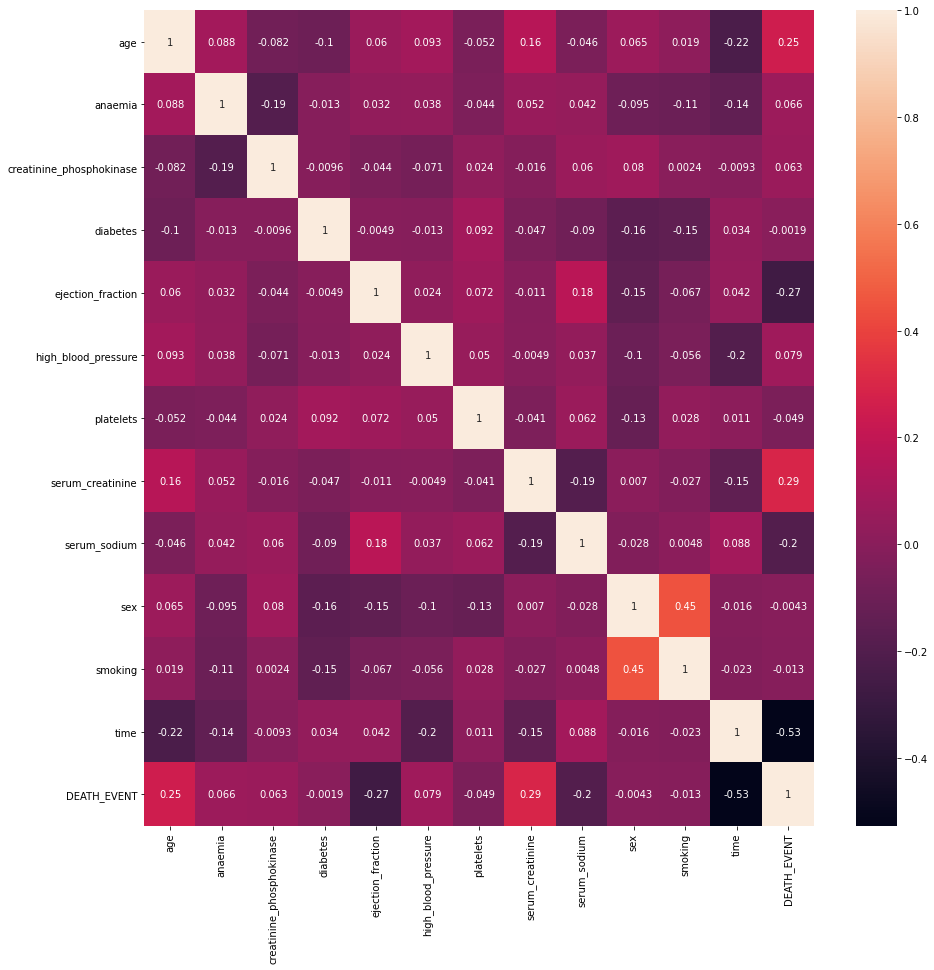

In [14]:
plt.figure(figsize=(15,15))
sea_born.heatmap(dataset.corr(),annot=True)
plt.show()

**From ABOVE Matrix we can remove diabetes. Since they show they are independent of DEATH_EVENT variable.**

**REMOVE COLUMNS BASED ON ABOVE COR-RELATION**

In [15]:
svm_output=dataset['DEATH_EVENT']
svm_input=dataset.iloc[: ,[0,1,2,4,5,6,7,8,10,11]].copy()

# SPLIT TRAIN AND TEST 

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(svm_input,svm_output, train_size=0.8, test_size=0.2,
                                                                random_state=32)
# Display results
print ("X_train: {}".format(X_train.shape))
print ("X_valid: {}".format(X_valid.shape))
print ("y_train: {}".format(y_train.shape))
print ("y_valid: {}\n".format(y_valid.shape))

X_train: (239, 10)
X_valid: (60, 10)
y_train: (239,)
y_valid: (60,)



# NORMALIZATION OF DATA

In [17]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_valid)

# SUPPORT VECTOR MACHINE

In [18]:
SVM_MODEL = svm.SVC()
SVM_MODEL.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
SVM_OUTPUT = SVM_MODEL.predict(X_test)

In [20]:
print(classification_report(y_valid,SVM_OUTPUT))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



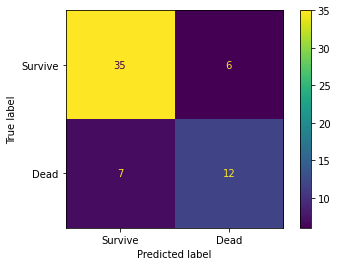

In [21]:
cm = confusion_matrix(y_valid, SVM_OUTPUT)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

In [22]:
print(metrics.accuracy_score(y_valid, SVM_OUTPUT))

0.7833333333333333


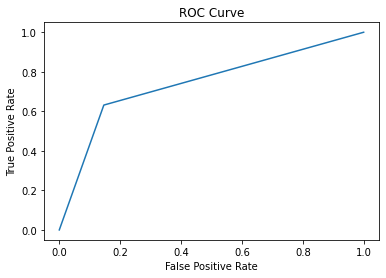

Area Under ROC Curve: 0.7426187419768934
Sensitivity: 0.631578947368421
Specificity: 0.8536585365853658
Accuracy: 0.7833333333333333


In [23]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_valid, SVM_OUTPUT, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show() 
# Print AUC
auc = np.trapz(fpr1,tpr1)
print('Area Under ROC Curve:', auc)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, SVM_OUTPUT)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

# Random Forest

In [24]:
clf_random=RandomForestClassifier(n_estimators=60)
clf_random.fit(X_train,y_train)
y_pred_random=clf_random.predict(X_test)
print(classification_report(y_valid,y_pred_random))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.75      0.79      0.77        19

    accuracy                           0.85        60
   macro avg       0.82      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60



In [25]:
print(metrics.accuracy_score(y_valid, y_pred_random))

0.85


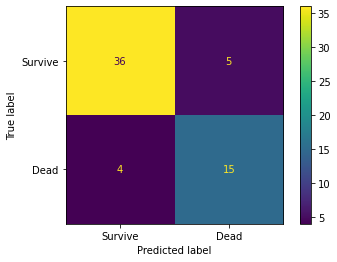

In [26]:
cm = confusion_matrix(y_valid, y_pred_random)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

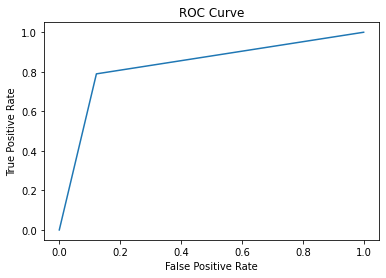

Area Under ROC Curve: 0.8337612323491655


In [27]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_valid, y_pred_random, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr2,fpr2)
plt.show() 
# Print AUC
auc = np.trapz(fpr2,tpr2)
print('Area Under ROC Curve:', auc)

In [28]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred_random)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7894736842105263
Specificity: 0.8780487804878049
Accuracy: 0.85


# Naive Bayes

In [29]:
clf_nv=GaussianNB()
clf_nv.fit(X_train,y_train)
y_pred_nv=clf_nv.predict(X_test)
print(classification_report(y_valid,y_pred_nv))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.62      0.53      0.57        19

    accuracy                           0.75        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.74      0.75      0.74        60



0.75


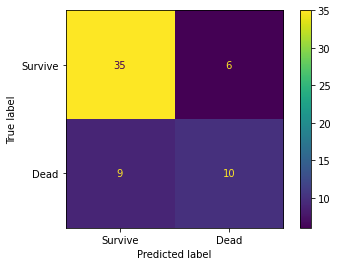

In [30]:
print(metrics.accuracy_score(y_valid, y_pred_nv))
cm = confusion_matrix(y_valid, y_pred_nv)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

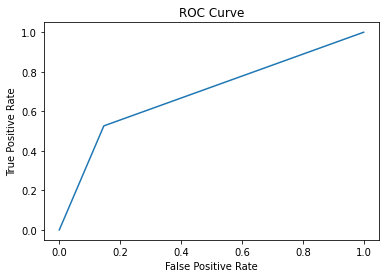

Area Under ROC Curve: 0.6899871630295249


In [31]:
fpr3, tpr3, thresholds = metrics.roc_curve(y_valid, y_pred_nv, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr3,fpr3)
plt.show() 
# Print AUC
auc = np.trapz(fpr3,tpr3)
print('Area Under ROC Curve:', auc)

In [32]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred_nv)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.5263157894736842
Specificity: 0.8536585365853658
Accuracy: 0.75


# MLP Classifier

In [33]:
mlpc_model = MLPClassifier(
    random_state=42)
mlpc_model.fit(X_train, y_train)
mlpc_pred = mlpc_model.predict(X_test)
print("\n",classification_report(y_valid, mlpc_pred))


               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


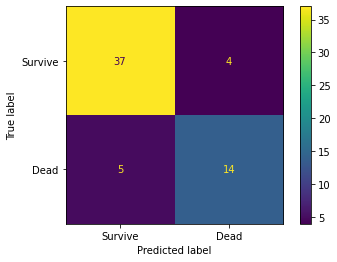

In [34]:
cm = confusion_matrix(y_valid, mlpc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

In [35]:
print(metrics.accuracy_score(y_valid, mlpc_pred))

0.85


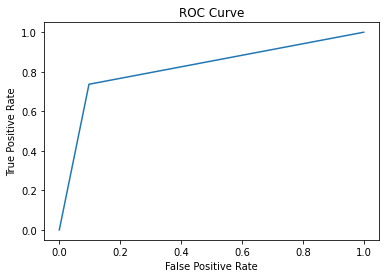

Area Under ROC Curve: 0.819640564826701


In [36]:

fpr4, tpr4, thresholds = metrics.roc_curve(y_valid, mlpc_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr4,fpr4)
plt.show() 
# Print AUC
auc = np.trapz(fpr4,tpr4)
print('Area Under ROC Curve:', auc)

In [37]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, mlpc_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7368421052631579
Specificity: 0.9024390243902439
Accuracy: 0.85


#XGB CLASSIFIER

In [38]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [39]:
xgb_classifier.fit(X_train, y_train)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [40]:
grid_search = GridSearchCV(estimator = xgb_classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [41]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)


In [42]:
print("\n",classification_report(y_valid, y_pred))


               precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



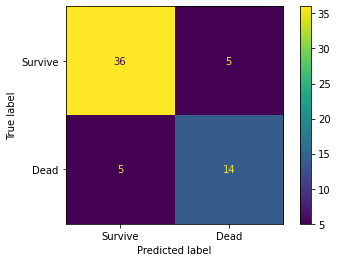

In [43]:
cm = confusion_matrix(y_valid, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

In [44]:
print(metrics.accuracy_score(y_valid, y_pred))

0.8333333333333334


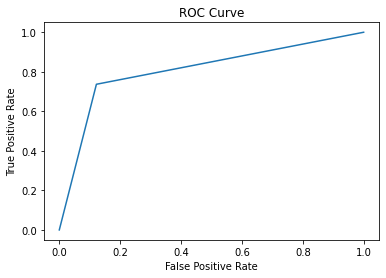

Area Under ROC Curve: 0.8074454428754815


In [45]:
fpr8, tpr8, thresholds = metrics.roc_curve(y_valid, y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr8,fpr8)
plt.show() 
# Print AUC
auc = np.trapz(fpr8,tpr8)
print('Area Under ROC Curve:', auc)

In [46]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7368421052631579
Specificity: 0.8780487804878049
Accuracy: 0.8333333333333334


# Adaboost

In [47]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

ada_pred = ada_clf.predict(X_test)


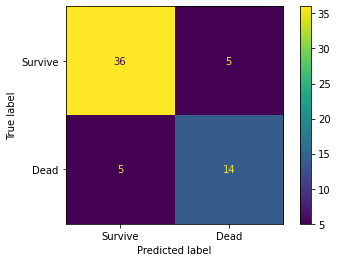

In [48]:
cm = confusion_matrix(y_valid, ada_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

In [49]:
print(metrics.accuracy_score(y_valid, ada_pred))


0.8333333333333334


In [50]:
print(classification_report(y_valid,ada_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



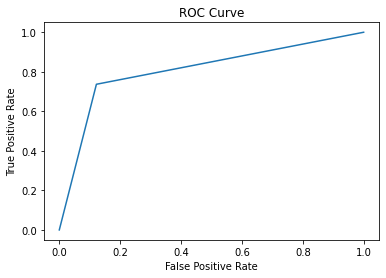

Area Under ROC Curve: 0.8074454428754815


In [51]:
fpr5, tpr5, thresholds = metrics.roc_curve(y_valid, ada_pred, pos_label=0)

# Print ROC curve
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr5,fpr5)
plt.show() 

# Print AUC
auc = np.trapz(fpr5,tpr5)
print('Area Under ROC Curve:', auc)

In [52]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, ada_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7368421052631579
Specificity: 0.8780487804878049
Accuracy: 0.8333333333333334


# KNN

In [53]:
print('K Nearest Neighbors')
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_prediction = knn.predict(X_test)
score = metrics.accuracy_score(y_valid,y_prediction)
print(score)

K Nearest Neighbors
0.6666666666666666


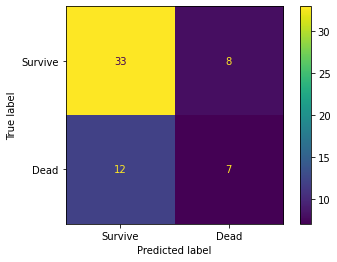

In [54]:
cm = confusion_matrix(y_valid, y_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

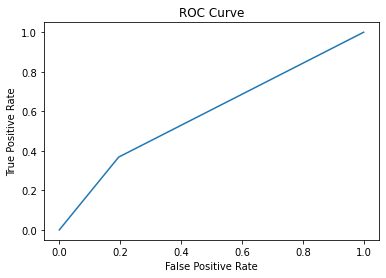

Area Under ROC Curve: 0.5866495507060334


In [55]:
fpr6, tpr6, thresholds = metrics.roc_curve(y_valid, y_prediction, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr6,fpr6)
plt.show() 
# Print AUC
auc = np.trapz(fpr6,tpr6)
print('Area Under ROC Curve:', auc)

In [56]:
print(classification_report(y_valid,y_prediction))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.47      0.37      0.41        19

    accuracy                           0.67        60
   macro avg       0.60      0.59      0.59        60
weighted avg       0.65      0.67      0.65        60



In [57]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_prediction)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.3684210526315789
Specificity: 0.8048780487804879
Accuracy: 0.6666666666666666


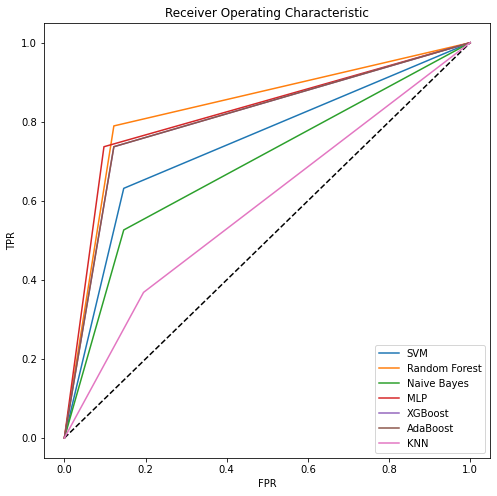

In [58]:
 plt.figure(figsize=(8, 8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(tpr1, fpr1, label= "SVM")
plt.plot(tpr2, fpr2, label= "Random Forest")
plt.plot(tpr3, fpr3, label= "Naive Bayes")
plt.plot(tpr4, fpr4, label= "MLP")
plt.plot(tpr8, fpr8, label= "XGBoost")
plt.plot(tpr5, fpr5, label= "AdaBoost")
plt.plot(tpr6, fpr6, label= "KNN")


plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# PCA AND XGBOOST

In [59]:
output_pca=dataset['DEATH_EVENT']
input_pca=dataset.iloc[: ,[0,1,2,3,4,5,6,7,8,9,10,11]].copy()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(input_pca,output_pca, test_size = 0.2, random_state = 0)

In [61]:
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [62]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.9, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
classifier.fit(X_train, y_train)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [63]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [64]:
y_pred_pca = classifier.predict(X_test)

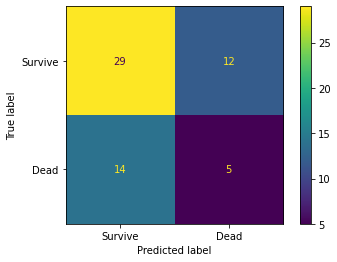

In [65]:
cm = confusion_matrix(y_valid, y_pred_pca)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

In [66]:
print(metrics.accuracy_score(y_valid, y_pred_pca))

0.5666666666666667


In [67]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred_pca)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.2631578947368421
Specificity: 0.7073170731707317
Accuracy: 0.5666666666666667


In [68]:
print("\n",classification_report(y_valid, y_pred_pca))


               precision    recall  f1-score   support

           0       0.67      0.71      0.69        41
           1       0.29      0.26      0.28        19

    accuracy                           0.57        60
   macro avg       0.48      0.49      0.48        60
weighted avg       0.55      0.57      0.56        60



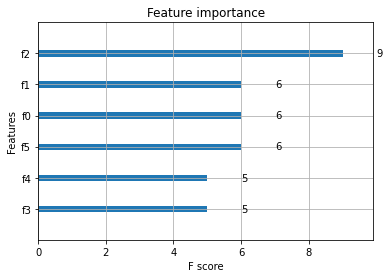

In [69]:
xgb.plot_importance(classifier)

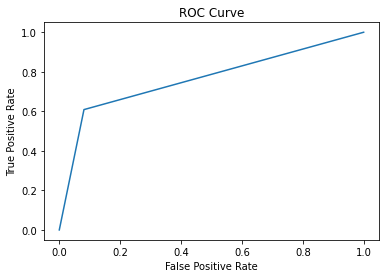

Area Under ROC Curve: 0.763807285546416


In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pca, pos_label=0)

# Print ROC curve
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr,fpr)
plt.show() 

# Print AUC
auc = np.trapz(fpr,tpr)
print('Area Under ROC Curve:', auc)